In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mail_data.csv')
df.sample(5)

,Category,Message,v3
632,ham,Thank u!,NaN
13,ham,I've been searching for the right words to tha...,NaN
3829,ham,Where are you ? What are you doing ? Are yuou ...,NaN
4466,ham,CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I W...,NaN
569,ham,Love it! Daddy will make you scream with pleas...,NaN


In [3]:
df.shape

(5572, 3)

In [4]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  5572 non-null   object 
 1   Message   5572 non-null   object 
 2   v3        0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 130.7+ KB


In [5]:
# drop last column
df.drop(columns=['v3'],inplace=True)
df.sample(5)

,Category,Message
2588,ham,"Aight, see you in a bit"
1517,ham,I need to come home and give you some good lov...
2003,spam,TheMob>Yo yo yo-Here comes a new selection of ...
1349,ham,"Nothing much, chillin at home. Any super bowl ..."
3144,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...


In [6]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df['Category']=encoder.fit_transform(df['Category'])

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# spam->1 ham->0

In [10]:
# missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
# duplicate values
df.duplicated().sum()

np.int64(415)

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5157, 2)

In [15]:
# EDA
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt

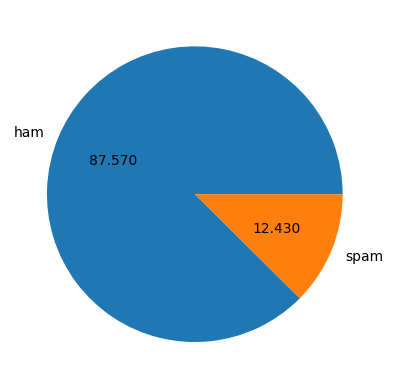

In [18]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [19]:
# data is imbalanced

In [20]:
# natural language toolkit
import nltk
# tokenizer mode
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\KESHAV/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# no. of charactes
df.loc[:,'characters']=df['Message'].apply(len)

In [22]:
df.head()

,Category,Message,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KESHAV/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
# no. of words
df.loc[:,'words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,Category,Message,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df.loc[:,'sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,Category,Message,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['Category']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam
df[df['Category']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

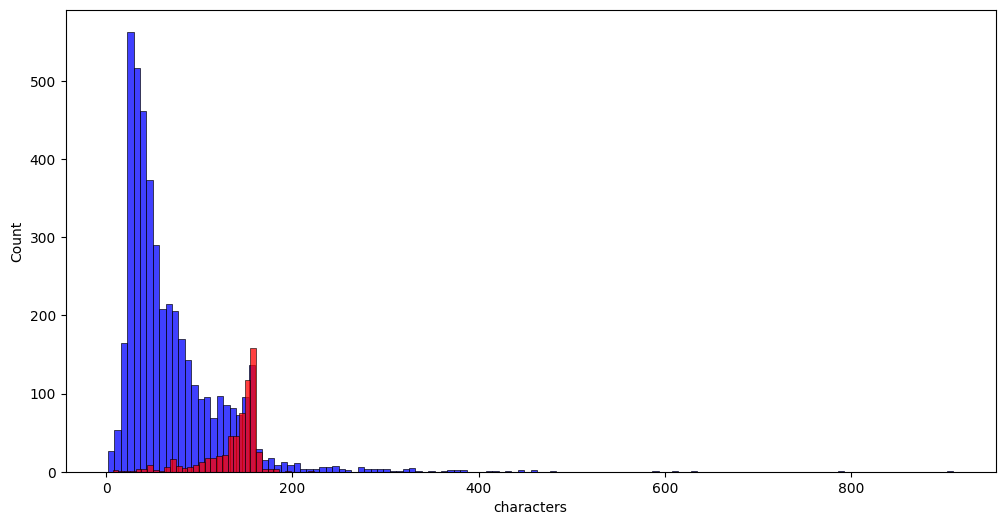

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['characters'],color='blue')
sns.histplot(df[df['Category']==1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

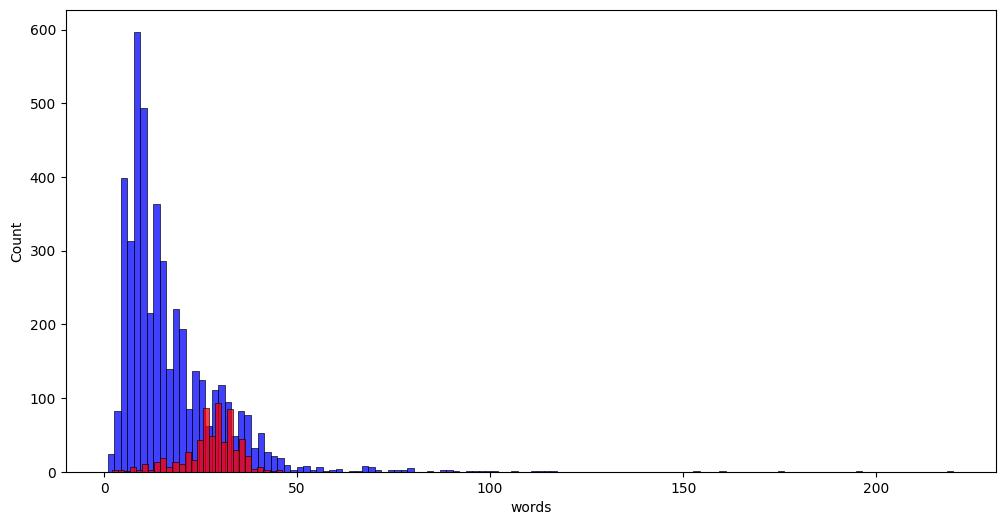

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['words'],color='blue')
sns.histplot(df[df['Category']==1]['words'],color='red')

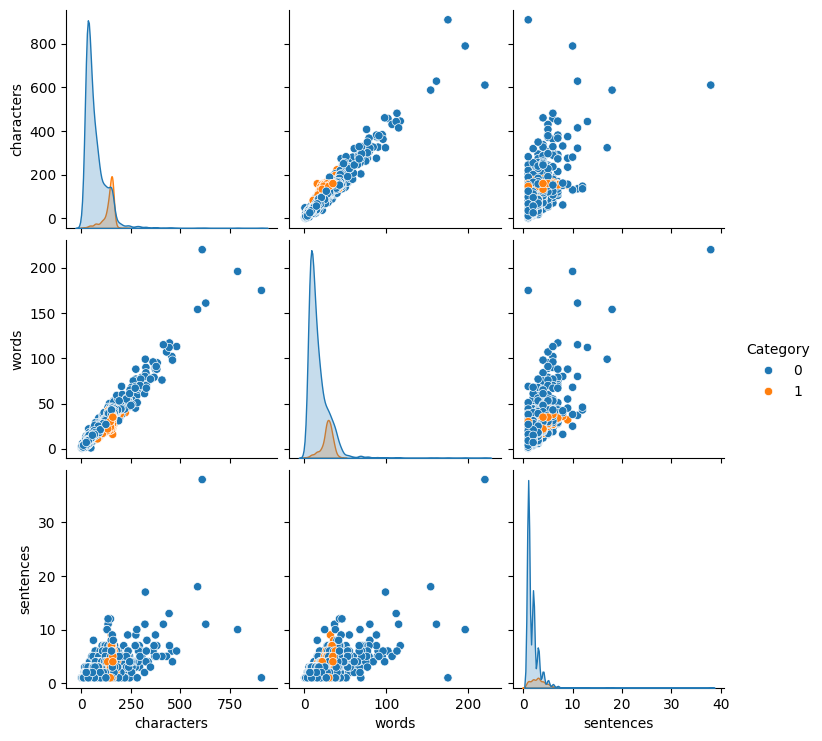

In [34]:
sns.pairplot(df,hue='Category')

<Axes: >

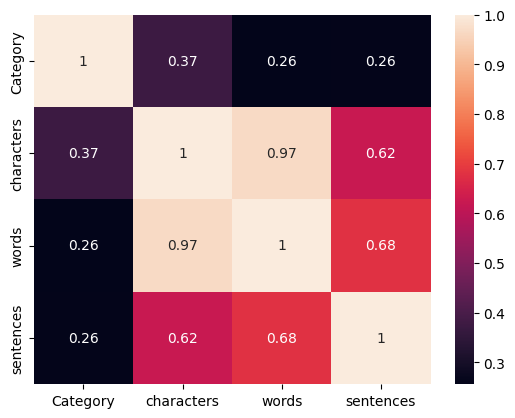

In [35]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [36]:
# Data Preprocessing

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KESHAV/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
def transform(text):
    # lower case
    text=text.lower()
    # tokenization
    text=nltk.word_tokenize(text)
    
    # remove special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    # remove stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    # stemming
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [111]:
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
df['transformed_text']=df['Message'].apply(transform)

In [41]:
df.head()

,Category,Message,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
# word count

In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=750,height=750,min_font_size=10,background_color='black')

In [44]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))

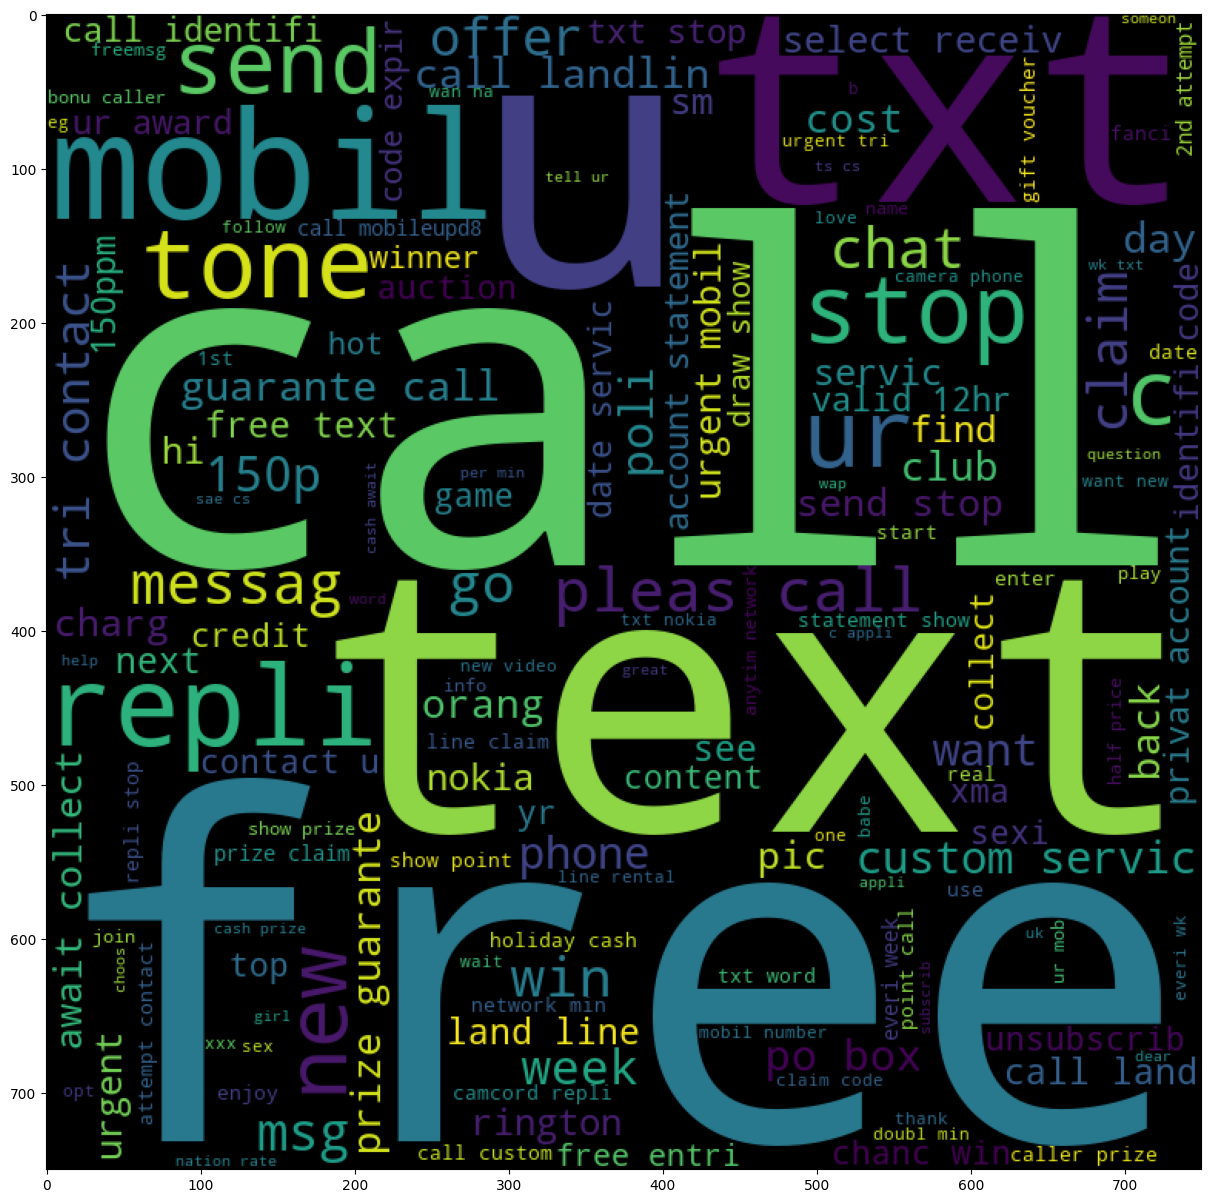

In [45]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))

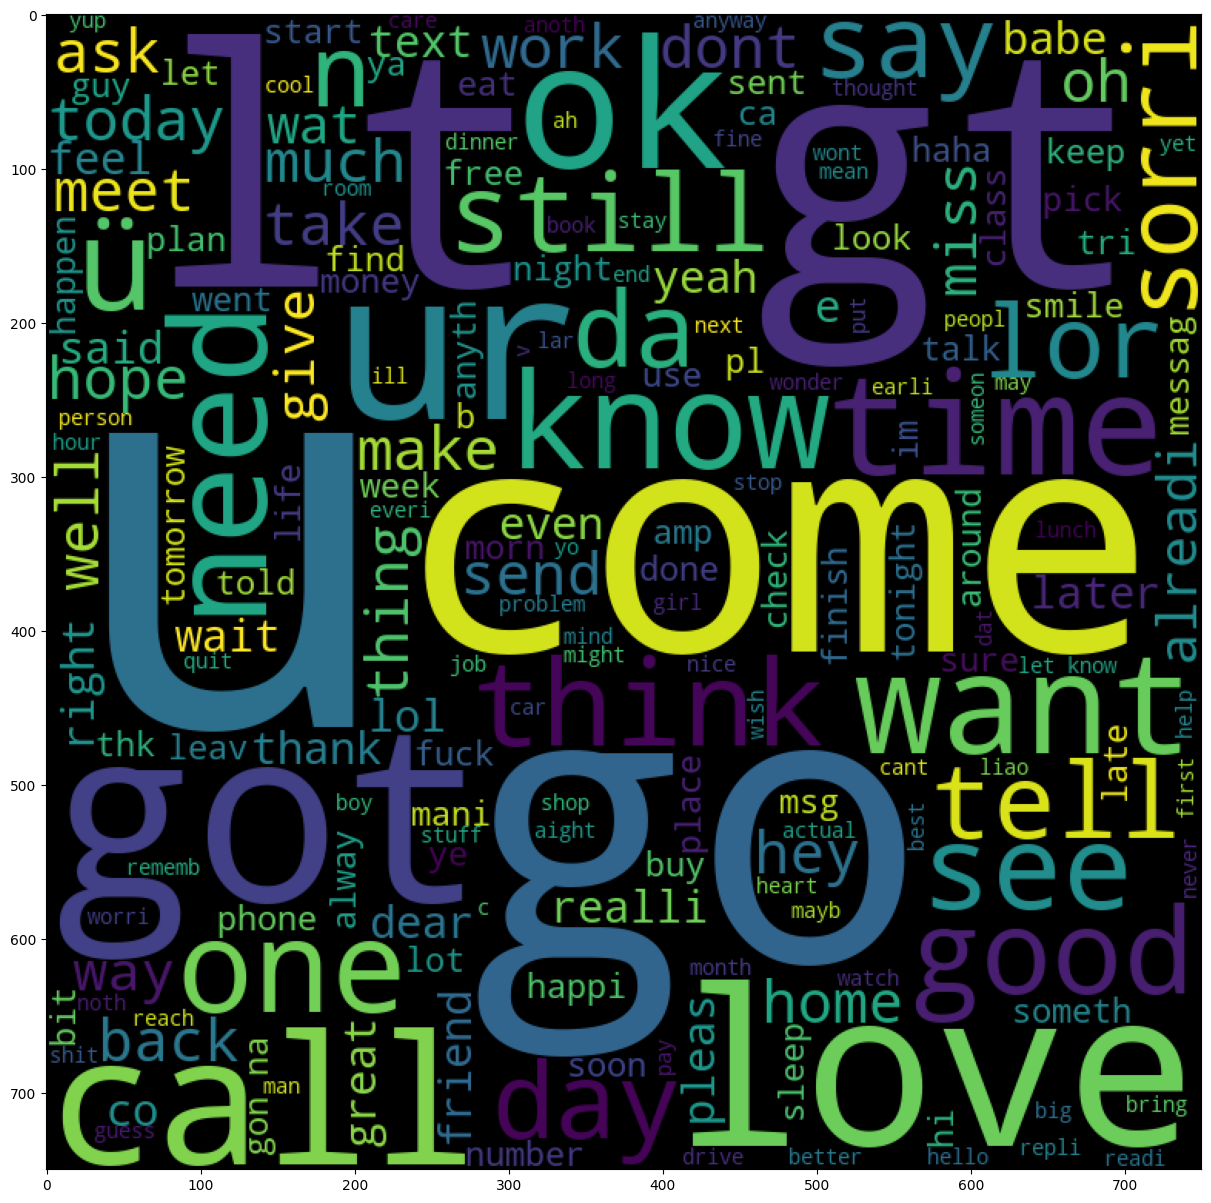

In [47]:
plt.figure(figsize=(15,15))
plt.imshow(ham_wc)

In [48]:
# most frequent words

In [49]:
from collections import Counter

In [50]:
spam_map=[]
for i in df[df['Category']==1]['transformed_text'].tolist():
    for j in i.split():
        spam_map.append(j)

In [51]:
spam_map

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

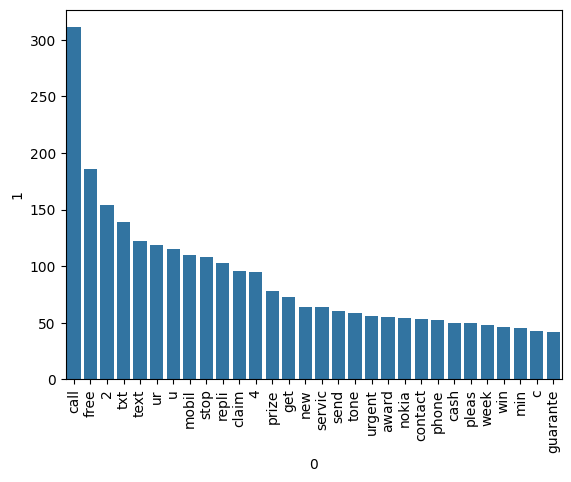

In [52]:
x=pd.DataFrame(Counter(spam_map).most_common(30))
sns.barplot(x=x[0],y=x[1],data=x)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_map=[]
for i in df[df['Category']==0]['transformed_text'].tolist():
    for j in i.split():
        ham_map.append(j)

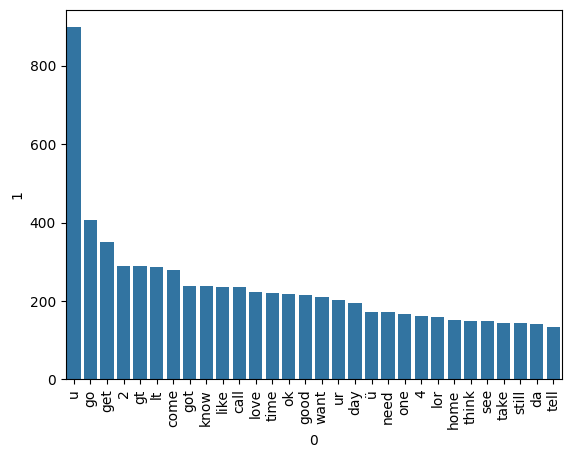

In [54]:
x=pd.DataFrame(Counter(ham_map).most_common(30))
sns.barplot(x=x[0],y=x[1],data=x)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head()

,Category,Message,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
# Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [58]:
cv=CountVectorizer()

In [59]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [60]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
y=df['Category'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[786 119]
 [ 16 111]]
0.4826086956521739


In [68]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


In [69]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [70]:
tfidf=TfidfVectorizer()

In [71]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [74]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2,algorithm="SAMME")
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
# training function
def train_fun(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    pre=precision_score(y_test,y_pred)
    
    return acc,pre

In [80]:
# with count Vectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()
y=df['Category'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    acc,pre= train_fun(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",acc)
    print("Precision - ",pre)
    
    accuracy_scores.append(acc)
    precision_scores.append(pre)

For  SVC
Accuracy -  0.9244186046511628
Precision -  0.696
For  KN
Accuracy -  0.9108527131782945
Precision -  1.0
For  GNB
Accuracy -  0.8691860465116279
Precision -  0.4826086956521739
For  MNB
Accuracy -  0.9796511627906976
Precision -  0.9206349206349206
For  BNB
Accuracy -  0.9718992248062015
Precision -  0.9711538461538461
For  DT
Accuracy -  0.9312015503875969
Precision -  0.9
For  LR
Accuracy -  0.9728682170542635
Precision -  0.9541284403669725
For  RF
Accuracy -  0.9699612403100775
Precision -  1.0
For  AdaBoost
Accuracy -  0.9244186046511628
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9641472868217055
Precision -  0.9591836734693877
For  ETC
Accuracy -  0.9748062015503876
Precision -  1.0
For  GBDT
Accuracy -  0.9505813953488372
Precision -  0.975
For  xgb
Accuracy -  0.9709302325581395
Precision -  0.970873786407767


In [82]:
performance_cv=pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [83]:
performance_cv

,Algorithms,Accuracy,Precision
1,KN,0.910853,1.000000
10,ETC,0.974806,1.000000
7,RF,0.969961,1.000000
11,GBDT,0.950581,0.975000
4,BNB,0.971899,0.971154
12,xgb,0.970930,0.970874
9,BgC,0.964147,0.959184
6,LR,0.972868,0.954128
8,AdaBoost,0.924419,0.945455
3,MNB,0.979651,0.920635


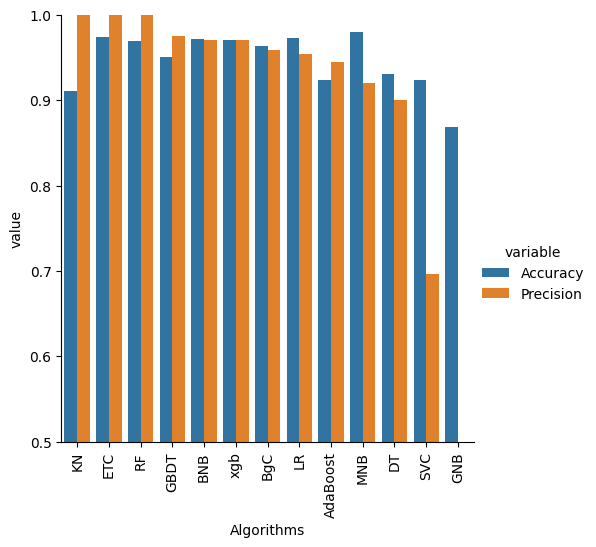

In [84]:
performance_cv1 = pd.melt(performance_cv, id_vars = "Algorithms")
sns.catplot(x = 'Algorithms', y='value', 
               hue = 'variable',data=performance_cv1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
# tfidf Vectorizer
tfidf=TfidfVectorizer()
Xt=tfidf.fit_transform(df['transformed_text']).toarray()
yt=df['Category'].values
Xt_train,Xt_test,yt_train,yt_test=train_test_split(Xt,yt,test_size=0.2,random_state=2)

In [86]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    acc,pre= train_fun(clf, Xt_train,yt_train,Xt_test,yt_test)
    
    print("For ",name)
    print("Accuracy - ",acc)
    print("Precision - ",pre)
    
    accuracy_scores.append(acc)
    precision_scores.append(pre)

For  SVC
Accuracy -  0.9718992248062015
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9040697674418605
Precision -  1.0
For  GNB
Accuracy -  0.8691860465116279
Precision -  0.4824561403508772
For  MNB
Accuracy -  0.9612403100775194
Precision -  1.0
For  BNB
Accuracy -  0.9718992248062015
Precision -  0.9711538461538461
For  DT
Accuracy -  0.935077519379845
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9515503875968992
Precision -  0.9230769230769231
For  RF
Accuracy -  0.9670542635658915
Precision -  1.0
For  AdaBoost
Accuracy -  0.9302325581395349
Precision -  0.8571428571428571
For  BgC
Accuracy -  0.9622093023255814
Precision -  0.9074074074074074
For  ETC
Accuracy -  0.9738372093023255
Precision -  1.0
For  GBDT
Accuracy -  0.9534883720930233
Precision -  0.9759036144578314
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9626168224299065


In [87]:
performance_tfidf=pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
performance_tfidf

,Algorithms,Accuracy,Precision
1,KN,0.904070,1.000000
3,MNB,0.961240,1.000000
7,RF,0.967054,1.000000
10,ETC,0.973837,1.000000
0,SVC,0.971899,0.980392
11,GBDT,0.953488,0.975904
4,BNB,0.971899,0.971154
12,xgb,0.972868,0.962617
6,LR,0.951550,0.923077
9,BgC,0.962209,0.907407


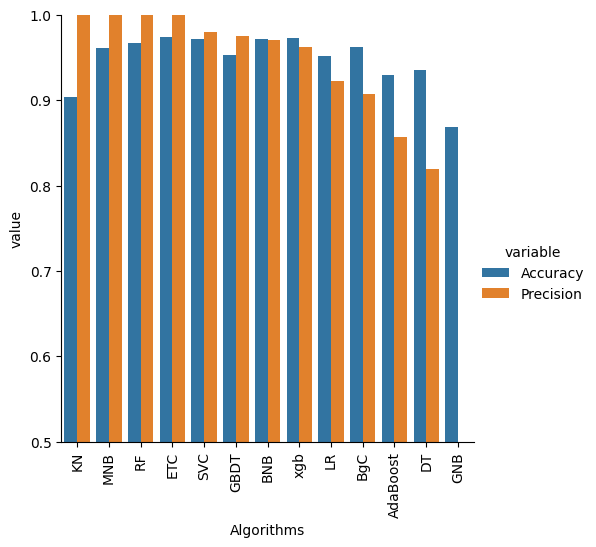

In [89]:
performance_tfidf1 = pd.melt(performance_tfidf, id_vars = "Algorithms")
sns.catplot(x = 'Algorithms', y='value', 
               hue = 'variable',data=performance_tfidf1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
# as precision matter more
# tfidf has better result than cv

In [91]:
# Algoritm that has show good result
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb=MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [92]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['Category'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [93]:
# Model Improvement

In [94]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

In [95]:
voting=VotingClassifier(estimators=[('mnb',mnb), ('rf',rfc), ('etc',etc)], voting='soft')

In [96]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [97]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9699612403100775
Precision 1.0


In [98]:
votingx=VotingClassifier(estimators=[('svm',svc),('mnb',mnb), ('rf',rfc), ('etc',etc)], voting='soft')

In [99]:
votingx.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [100]:
y_pred = votingx.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9757751937984496
Precision 1.0


In [101]:
from sklearn.ensemble import StackingClassifier

In [102]:
esti=[('svm',svc),('nb',mnb),('et',etc)]
final=rfc

In [103]:
stack=StackingClassifier(estimators=esti,final_estimator=final)

In [104]:
stack.fit(X_train,y_train)
y_pred = stack.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.9736842105263158


In [105]:
esti=[('svm',svc),('nb',mnb),('et',etc),('rf',rfc)]
final=LogisticRegression()
stack=StackingClassifier(estimators=esti,final_estimator=final)
stack.fit(X_train,y_train)
y_pred = stack.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835271317829457
Precision 0.9910714285714286


In [106]:
esti=[('nb',mnb),('et',etc),('rf',rfc)]
final=LogisticRegression()
stack=StackingClassifier(estimators=esti,final_estimator=final)
stack.fit(X_train,y_train)
y_pred = stack.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854651162790697
Precision 1.0


In [107]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(stack,open('model.pkl','wb'))

In [112]:
input_mail="I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"
# convert text to feature vectors
input_data=transform(input_mail)
input_data

'search right word thank breather promis wont take help grant fulfil promis wonder bless time'

In [124]:
tfidf=pickle.load(open('vectorizer.pkl','rb'))
model=pickle.load(open('model.pkl','rb'))

In [125]:
inputx=tfidf.transform([input_data])

In [129]:
prediction = model.predict(inputx)
print(prediction)


if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
